In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#take splittig function
from sklearn.model_selection import train_test_split
#import ML models
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#import metrics for evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
df = pd.read_csv('../kaggle_dataset/news_tfidf_text.csv')
df.head()

,accord,add,allow,already,also,america,american,among,another,appear,...,win,without,woman,work,world,would,write,year,yet,lbl
0,0.000000,0.0,0.037253,0.072356,0.045443,0.000000,0.026805,0.000000,0.0,0.036397,...,0.000000,0.07152,0.036966,0.000000,0.000000,0.022013,0.000000,0.046083,0.000000,1
1,0.000000,0.0,0.000000,0.089630,0.000000,0.000000,0.000000,0.000000,0.0,0.090173,...,0.000000,0.00000,0.091581,0.000000,0.077949,0.054537,0.000000,0.000000,0.000000,1
2,0.000000,0.0,0.000000,0.000000,0.000000,0.096716,0.231899,0.103827,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066448,0.000000,0
3,0.066107,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.074316,0.0,0.000000,...,0.000000,0.00000,0.000000,0.112672,0.000000,0.000000,0.070498,0.000000,0.000000,1
4,0.000000,0.0,0.000000,0.000000,0.050593,0.000000,0.000000,0.000000,0.0,0.000000,...,0.547702,0.00000,0.000000,0.000000,0.000000,0.049015,0.000000,0.051305,0.081349,0


In [3]:
Y = df['lbl']
x = df.drop(columns= 'lbl')

In [4]:
x.shape

(6335, 184)

In [5]:
Y.shape

(6335,)

In [6]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 10)
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((5068, 184), (1267, 184), (5068,), (1267,))

In [7]:
lgbm = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, verbose = -1, random_state=10)
#learning rate is the hillclimbing step in minimizing error function
#verbose = -1 disables verbose logging of all trees states
#training the model
lgbm.fit(x_train, Y_train)

LGBMClassifier(max_depth=3, n_estimators=200, n_jobs=-1, random_state=10,
               verbose=-1)

In [8]:
Y_predict_test = lgbm.predict(x_test)
accuracy_lgbm = accuracy_score(Y_test, Y_predict_test)
print('Accuracy for LGBM test is: ', accuracy_lgbm)
precision_lgbm = precision_score(Y_test, Y_predict_test)
recall_lgbm = recall_score(Y_test, Y_predict_test)
print('Precision for LGBM test is: ', precision_lgbm)
print('Recall for LGBM test is: ', recall_lgbm)

Accuracy for LGBM test is:  0.8500394632991318
Precision for LGBM test is:  0.8262243285939969
Recall for LGBM test is:  0.867330016583748


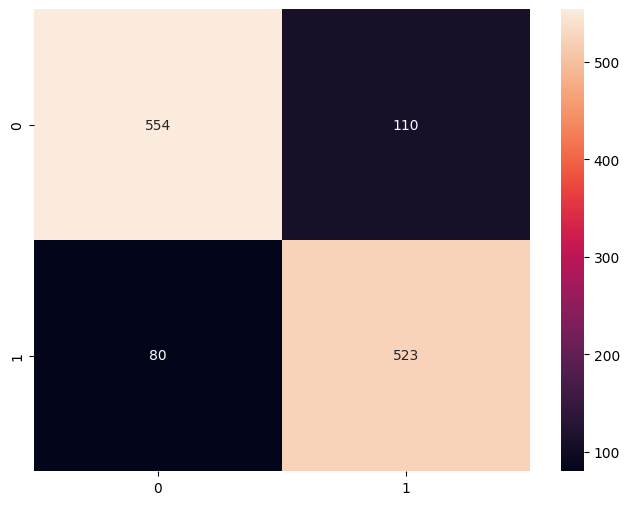

In [9]:
cm_lgbm = confusion_matrix(Y_test, Y_predict_test)
#visualise confusion matrix
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_lgbm, annot = True, fmt = 'd') #with annotations formatted as decimal
plt.show()

In [10]:
Y_predict_train = lgbm.predict(x_train)

#assess on train data
accuracy_test = accuracy_score(Y_train, Y_predict_train)
precision_test = precision_score(Y_train, Y_predict_train)
recall_test = recall_score(Y_train, Y_predict_train)
print('Accuracy train is :', accuracy_test)
print('Precision train is :', precision_test)
print('Recall train is :', recall_test)

Accuracy train is : 0.9267955801104972
Precision train is : 0.9119638826185101
Recall train is : 0.9465052713783678


Save trained model to file

In [18]:
import joblib
vectorizer = joblib.load('../models/lgbm/tf_idf_vectorizer.pkl')
print(vectorizer.get_feature_names_out())
joblib.dump(lgbm, '../models/lgbm/model.pkl')

['accord' 'add' 'allow' 'already' 'also' 'america' 'american' 'among'
 'another' 'appear' 'around' 'ask' 'attack' 'back' 'bad' 'base' 'become'
 'begin' 'believe' 'big' 'bring' 'call' 'campaign' 'candidate' 'case'
 'change' 'claim' 'clear' 'clinton' 'close' 'come' 'continue' 'could'
 'country' 'day' 'deal' 'democrat' 'democratic' 'donald' 'early'
 'election' 'end' 'even' 'every' 'face' 'fact' 'far' 'fight' 'find'
 'first' 'follow' 'force' 'former' 'get' 'give' 'go' 'good' 'government'
 'great' 'group' 'happen' 'help' 'high' 'hillary' 'hold' 'house' 'however'
 'include' 'interest' 'issue' 'john' 'keep' 'know' 'large' 'last' 'late'
 'law' 'lead' 'leader' 'least' 'leave' 'less' 'life' 'like' 'likely'
 'long' 'look' 'lose' 'make' 'many' 'may' 'mean' 'medium' 'member' 'might'
 'million' 'month' 'move' 'much' 'nation' 'national' 'need' 'never' 'new'
 'news' 'next' 'number' 'obama' 'official' 'one' 'part' 'party' 'past'
 'people' 'place' 'plan' 'point' 'policy' 'political' 'post' 'power'
 'pre

['../models/lgbm/model.pkl']